In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import datetime
import dateparser
import matplotlib
import matplotlib.pyplot as plt

In [23]:
with open(r'ubereat.html', "r") as f:
    page = f.read()
soup = BeautifulSoup(page)
commandes = soup.find("div", {"class": "ce cf cg c8 ch"})
tab_commandes = commandes.find_all("div", {"class": "g6"})
print("nb de commandes: " + str(len(tab_commandes)))

nb de commandes: 69


In [35]:
vals = {"resto": [], "prix": [], "datetime": []}
(current, previous, year) = ("", "", 2021)
for obj in tab_commandes:
    val = obj.find("div", {"class": "cs f5 bv d7"}).get_text(strip=True).split("•")
    date_et_heure = val[1].replace(u'\xa0', u' ')
    print(date_et_heure)
    if "Annulée le" in date_et_heure:
        continue
    (date, heure) = date_et_heure.split(" à ")
    current = date
    (heure, minute) = heure.split(":")
    vals["resto"].append(obj.find("div", {"class": "ag bh f2 g9"}).get_text())
    prix = float(val[0].split("pour")[-1].split("€")[0].strip().replace(",", "."))
    if current and previous and "déc." in current and "janv." in previous:
        year -= 1
    previous = current
    parsed_date = dateparser.parse(date + " " + str(year))
    time = datetime.time(int(heure), int(minute))
    vals["datetime"].append(parsed_date.combine(parsed_date, time, tzinfo=None))
    vals["prix"].append(prix)

28 janv. à 13:12
21 janv. à 20:25
18 janv. à 19:35
13 janv. à 13:52
31 déc. à 21:29
30 déc. à 12:54
23 déc. à 13:10
21 déc. à 23:02
20 déc. à 20:51
18 déc. à 23:19
13 déc. à 12:34
11 déc. à 12:18
02 déc. à 14:15
26 nov. à 12:30
12 nov. à 21:01
03 nov. à 15:06
31 oct. à 22:09
30 oct. à 22:48
Annulée le 30 oct. à 22:16
24 oct. à 23:20
14 oct. à 22:19
10 oct. à 23:26
03 oct. à 22:32
27 sept. à 20:35
26 sept. à 00:47
19 sept. à 22:53
15 sept. à 00:34
13 sept. à 22:50
07 sept. à 14:03
02 sept. à 20:31
26 août à 17:06
23 août à 16:34
19 août à 16:54
16 août à 21:12
13 août à 22:18
11 août à 15:10
08 août à 14:27
03 août à 17:06
29 juil. à 12:29
22 juil. à 21:40
20 juil. à 14:45
15 juil. à 16:47
03 juil. à 22:46
01 juil. à 22:26
29 juin à 13:58
17 juin à 15:37
11 juin à 13:00
03 juin à 14:09
22 mai à 23:29
19 mai à 22:35
15 mai à 12:50
11 mai à 22:47
29 avr. à 22:32
22 avr. à 22:32
16 avr. à 22:01
15 avr. à 21:35
11 avr. à 22:56
02 avr. à 21:42
31 mars à 21:22
30 mars à 23:28
28 mars à 16:08


In [32]:
dateparser.parse("10 déc. 2010")

datetime.datetime(2010, 12, 10, 0, 0)

In [34]:
current = "a"
if current:
    print("bonjour")

bonjour


In [36]:
date

'10 déc.'

In [37]:
data = {
    "resto": vals["resto"],
    "datetime": vals["datetime"],
    "prix": vals["prix"]
}
df = pd.DataFrame(data)

In [6]:
print("somme: ", df["prix"].sum())
print("moyenne: ", df["prix"].mean())

somme:  1278.4800000000002
moyenne:  18.80117647058824


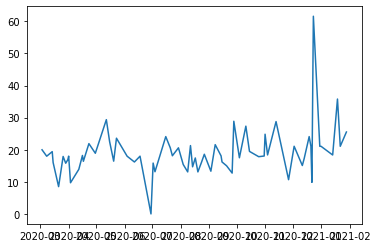

In [52]:
x = df["datetime"][:-2]#.to_list()
y = df["prix"][:-2]#.to_list()

plt.plot(x, y)
plt.show() # affiche la figure a l'ecran

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                                       resto            datetime   prix
0                              SMATCH BURGER 2021-01-28 13:12:00  25.52
1                              SMATCH BURGER 2021-01-21 20:25:00  21.07
2                                      Kaiyō 2021-01-18 19:35:00  35.79
3                            Sushi Muraguchi 2021-01-13 13:52:00  18.36
4                              SMATCH BURGER 2020-12-31 21:29:00  21.07
5                              SMATCH BURGER 2020-12-30 12:54:00  21.07
6      Out-Fry 18 - Korean Chicken by Taster 2020-12-23 13:10:00  61.59
7      Five Pizza Original - Kremlin-Bicetre 2020-12-21 23:02:00   9.84
8                              SMATCH BURGER 2020-12-20 20:51:00  21.07
9                                        Wan 2020-12-18 23:19:00  24.09
10                             SMATCH BURGER 2020-12-13 12:34:00  17.24
11                         Subway® - Tolbiac 2020-12-11 12:18:00  15.08
12                 Bozen - Charenton-le-Pont 2020-12-02 14:15:00